## Imports

In [1]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import sklearn
from pandas import Series, DataFrame
from pylab import rcParams
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import classification_report

## We should only use only 'Pclass','Sex', 'Age', 'SibSp', 'Parch','Fare' columns

In [2]:
data = pd.read_csv("titanic-train.csv")
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


## age and cabin have null values... cabin has very less values


In [4]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
data['Pclass'].unique()
data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

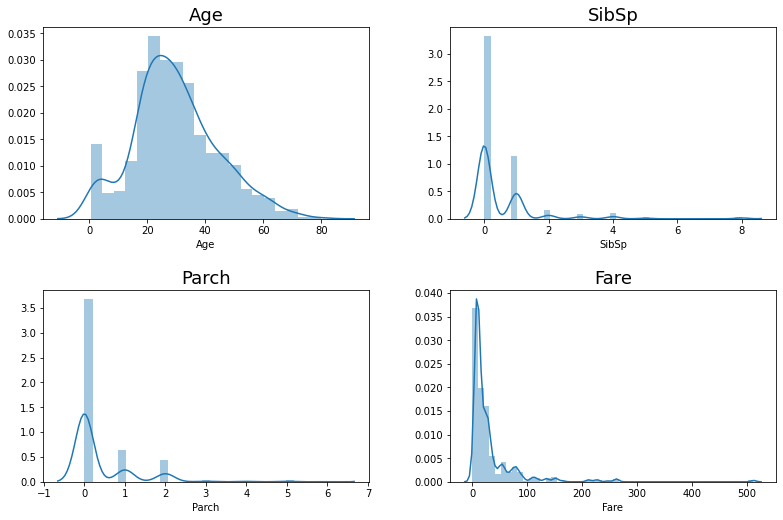

In [6]:
import statsmodels

fig, ax = plt.subplots(2, 2 ,figsize = [12,8])
fig.tight_layout(pad=5.0)
# can use for loop, if to much columns
sb.distplot(ax = ax[0, 0], a = data['Age'].dropna())
ax[0, 0].set_title('Age', fontsize = 18)

sb.distplot(ax = ax[0, 1], a = data['SibSp'].dropna())
ax[0, 1].set_title('SibSp', fontsize = 18)

sb.distplot(ax = ax[1, 0], a = data['Parch'].dropna())
ax[1, 0].set_title('Parch', fontsize = 18)

sb.distplot(ax = ax[1, 1], a = data['Fare'].dropna())
ax[1, 1].set_title('Fare', fontsize = 18)

plt.show()

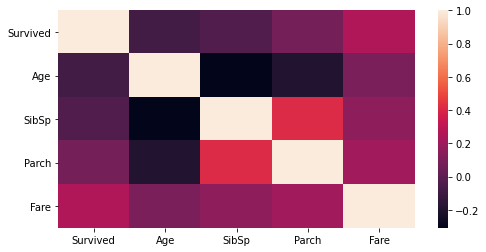

In [7]:
heatmapdata = data[['Survived', 'Age', 'SibSp', 'Parch', 'Fare']]

cormat = heatmapdata.corr()
fig, ax = plt.subplots(figsize = [8,4])
sb.heatmap(data = cormat)
plt.show()

## Handling missing data

In [8]:
# fill age column

data1 = data.copy()
data1['Age'].fillna(data1['Age'].median(), inplace = True)


In [9]:
# drop cabin

data1.drop(['Cabin'], axis = 1, inplace = True)


In [10]:
data1.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked'],
      dtype='object')

In [11]:
sex_df = data1['Sex']
encode = LabelEncoder()
sex_df = encode.fit_transform(sex_df)
data1['Sex'] = sex_df

In [12]:
data1.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,S


In [13]:
X = data1[['Pclass','Sex', 'Age', 
           'SibSp','Parch','Fare']]
y = data1['Survived']

scalar = StandardScaler()

x_transform = scalar.fit_transform(X)

In [14]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x_transform ,y,test_size = 0.30, random_state= 355)

### Fitting the model

In [15]:
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier()
clf.fit(x_train,y_train)

DecisionTreeClassifier()

In [16]:
# accuracy

clf.score(x_test,y_test)

0.753731343283582

### 75%

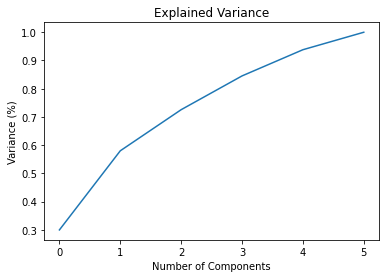

In [17]:
from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt
pca = PCA()
principalComponents = pca.fit_transform(x_transform)
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Variance (%)') #for each component
plt.title('Explained Variance')
plt.show()

In [18]:
# we are tuning three hyperparameters right now, we are passing the different values for both parameters

grid_param = {
    'criterion': ['gini', 'entropy'],
    'max_depth' : range(2,32,1),
    'min_samples_leaf' : range(1,10,1),
    'min_samples_split': range(2,10,1),
    'splitter' : ['best', 'random']
    
}

In [19]:
from sklearn.model_selection import GridSearchCV

grid_search = GridSearchCV(estimator=clf,
                     param_grid=grid_param,
                     cv=5,
                    n_jobs =-1)

In [20]:
grid_search.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(2, 32),
                         'min_samples_leaf': range(1, 10),
                         'min_samples_split': range(2, 10),
                         'splitter': ['best', 'random']})

In [21]:
best_parameters = grid_search.best_params_
print(best_parameters)

{'criterion': 'gini', 'max_depth': 7, 'min_samples_leaf': 2, 'min_samples_split': 7, 'splitter': 'random'}


In [22]:
clf = DecisionTreeClassifier(criterion = 'gini', max_depth =17,min_samples_leaf=1, min_samples_split = 6, splitter ='random')
clf.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=17, min_samples_split=6, splitter='random')

In [23]:
clf.score(x_test, y_test)

0.8097014925373134

## our accuracy has improved by about 5%!!!

#### i learnt about ccp_alpha values so we'll try that as well...

In [24]:
path = clf.cost_complexity_pruning_path(x_train,y_train)
ccp_alphas , impurities = path.ccp_alphas, path.impurities

In [25]:
len(ccp_alphas)

46

In [37]:
clfs = []

for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=0,ccp_alpha=ccp_alpha)
    clf.fit(x_train,y_train)
    clfs.append(clf)
    print("acc={}  test={}  train={}".format(np.round(ccp_alpha,7),np.round(clf.score(x_test,y_test),2),np.round(clf.score(x_train,y_train)),2))
    


acc=0.0  test=0.74  train=1.0
acc=3.44e-05  test=0.74  train=1.0
acc=9.84e-05  test=0.74  train=1.0
acc=0.0001204  test=0.74  train=1.0
acc=0.0001581  test=0.74  train=1.0
acc=0.0002326  test=0.74  train=1.0
acc=0.0002675  test=0.74  train=1.0
acc=0.0003137  test=0.74  train=1.0
acc=0.0003168  test=0.74  train=1.0
acc=0.000331  test=0.74  train=1.0
acc=0.0004013  test=0.74  train=1.0
acc=0.0004127  test=0.74  train=1.0
acc=0.0004127  test=0.74  train=1.0
acc=0.000428  test=0.74  train=1.0
acc=0.0004288  test=0.74  train=1.0
acc=0.00045  test=0.74  train=1.0
acc=0.0004777  test=0.74  train=1.0
acc=0.000535  test=0.73  train=1.0
acc=0.0006115  test=0.73  train=1.0
acc=0.0007338  test=0.73  train=1.0
acc=0.0007357  test=0.73  train=1.0
acc=0.0008304  test=0.73  train=1.0
acc=0.0008374  test=0.73  train=1.0
acc=0.0008917  test=0.73  train=1.0
acc=0.0010423  test=0.74  train=1.0
acc=0.0010701  test=0.74  train=1.0
acc=0.0010701  test=0.74  train=1.0
acc=0.0010701  test=0.75  train=1.0
acc=0

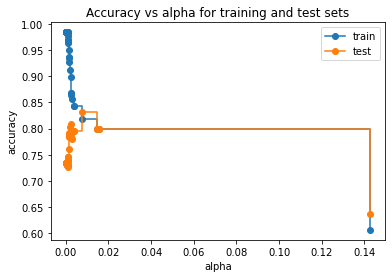

In [30]:
train_scores = [clf.score(x_train,y_train) for clf in clfs]
test_scores = [clf.score(x_test,y_test) for clf in clfs]

fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for training and test sets")
ax.plot(ccp_alphas, train_scores, marker="o", label="train", drawstyle="steps-post")
ax.plot(ccp_alphas, test_scores, marker="o", label="test", drawstyle="steps-post")
ax.legend()
plt.show()

### we are getting 83% accuracy for ccp_alpha=0.007517202551066998

In [48]:
clf = DecisionTreeClassifier(ccp_alpha=0.007517202551066998,random_state=0)
clf.fit(x_train,y_train)
print(clf.score(x_train,y_train))
print(clf.score(x_test,y_test))

0.8186195826645265
0.832089552238806


In [49]:
y_pred = clf.predict(x_test)

## performance metrics

In [50]:
from sklearn.metrics import confusion_matrix,precision_score,recall_score,f1_score, accuracy_score

confusion_matrix(y_test,y_pred)

array([[154,  17],
       [ 28,  69]], dtype=int64)

In [51]:
accuracy_score(y_test,y_pred)

0.832089552238806

In [52]:
precision_score(y_test,y_pred)

0.8023255813953488

In [53]:
recall_score(y_test,y_pred)

0.711340206185567

### Thank you